In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, roc_curve, auc,roc_auc_score
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('../data/shopping_trends.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [8]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [9]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

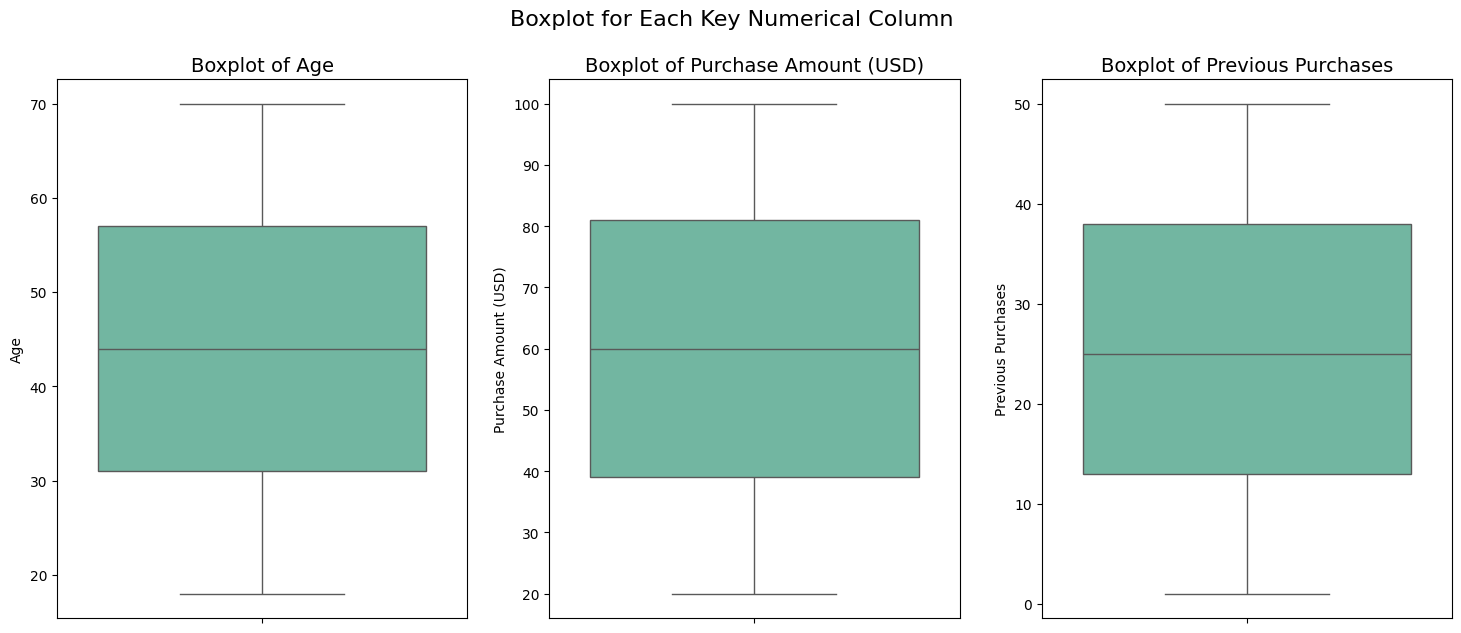

In [10]:
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
fig.suptitle('Boxplot for Each Key Numerical Column', fontsize=16)

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel('')
plt.show()

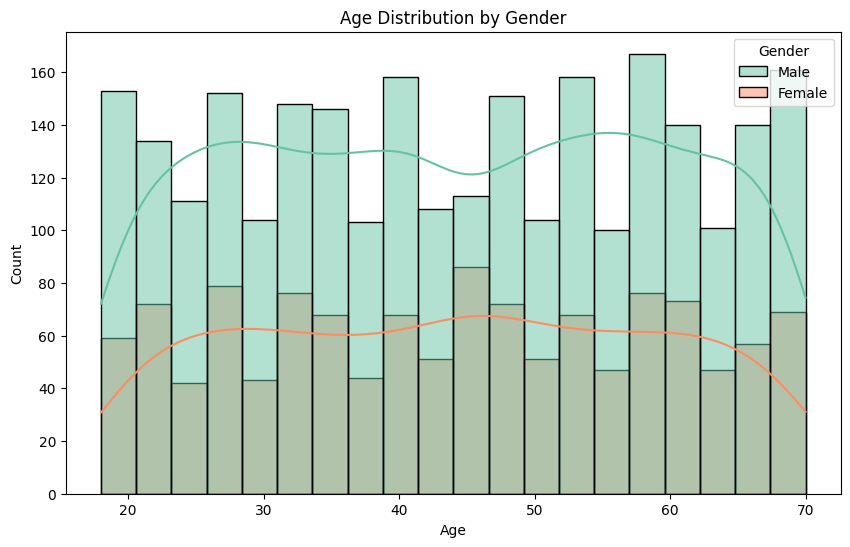

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Gender', kde=True, bins=20, palette='Set2')
plt.title("Age Distribution by Gender")
plt.show()

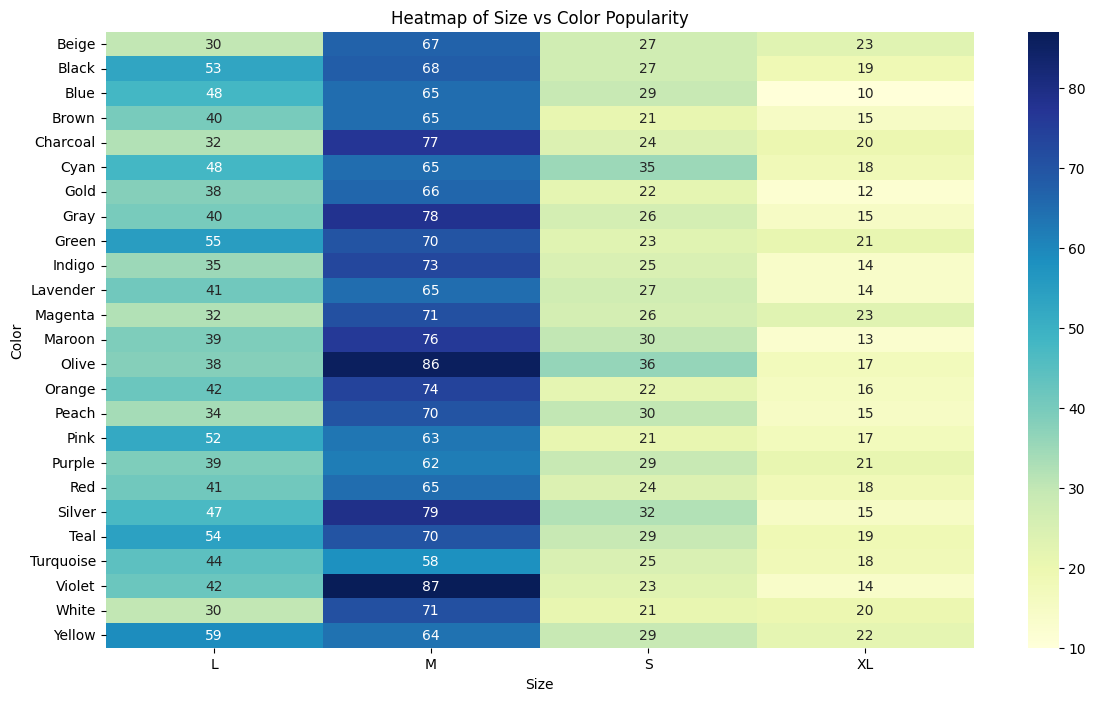

In [12]:
heatmap_data = df.groupby(['Color', 'Size']).size().unstack(fill_value=0)
plt.figure(figsize=(14,8))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Size vs Color Popularity")
plt.show()

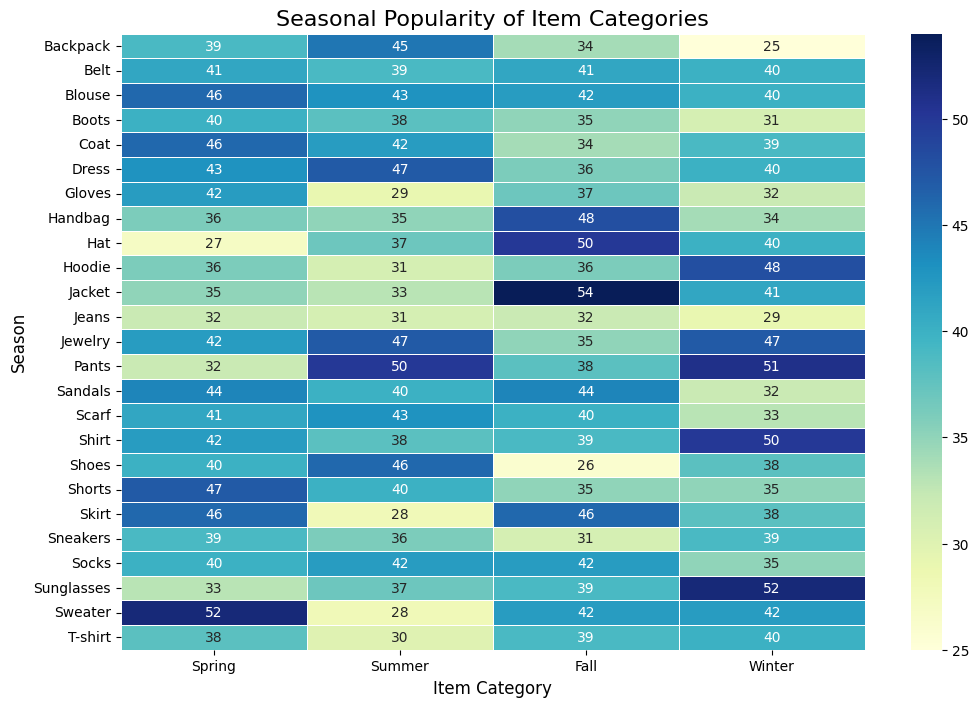

In [13]:
seasonal_pivot = pd.crosstab(df['Item Purchased'], df['Season'])
seasonal_pivot = seasonal_pivot[['Spring', 'Summer', 'Fall', 'Winter']]

plt.figure(figsize=(12, 8))
sns.heatmap(seasonal_pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Seasonal Popularity of Item Categories', fontsize=16)
plt.xlabel('Item Category', fontsize=12)
plt.ylabel('Season', fontsize=12)

plt.show()

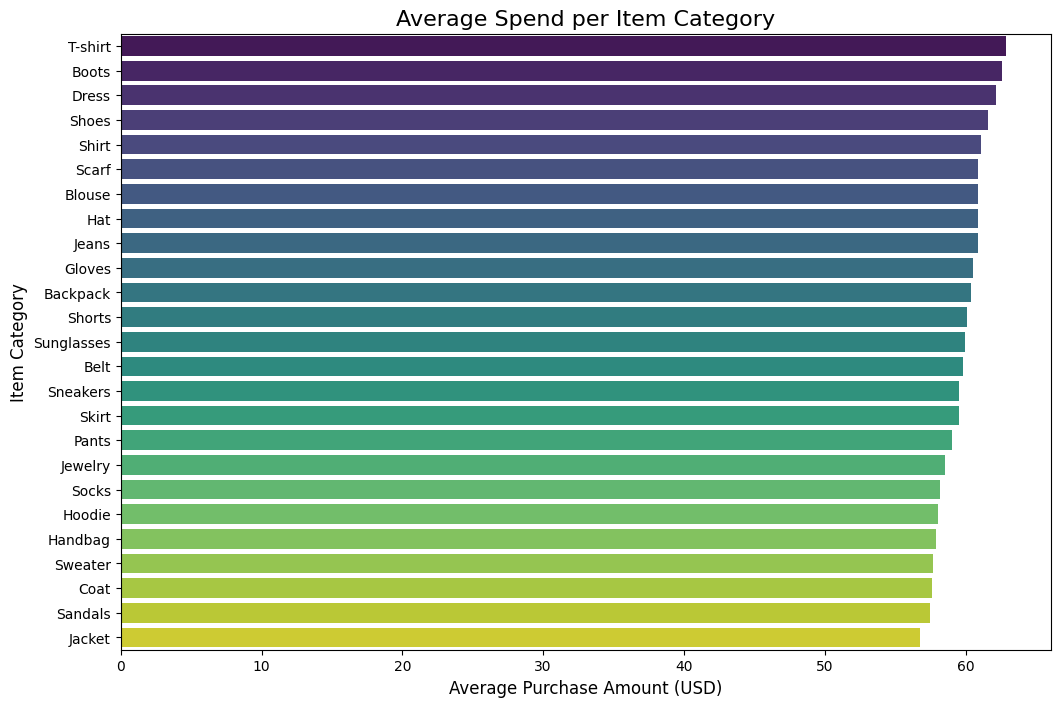

In [14]:
avg_spend_by_category = df.groupby('Item Purchased')['Purchase Amount (USD)'].mean().sort_values(ascending=False).reset_index()

# Create the figure
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_spend_by_category, x='Purchase Amount (USD)', y='Item Purchased', palette='viridis')
plt.title('Average Spend per Item Category', fontsize=16)
plt.xlabel('Average Purchase Amount (USD)', fontsize=12)
plt.ylabel('Item Category', fontsize=12)
plt.show()

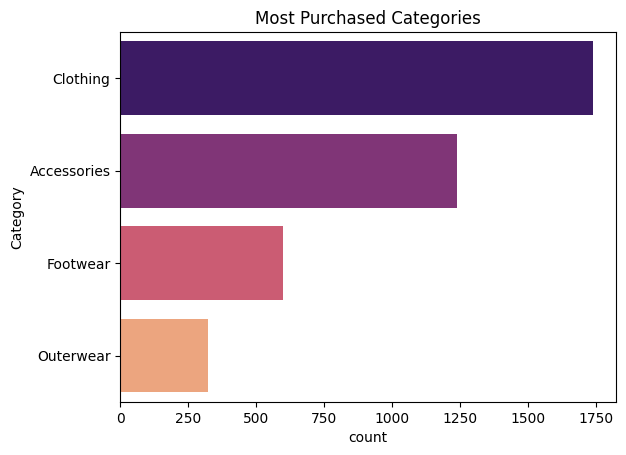

In [15]:
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, palette='magma')
plt.title("Most Purchased Categories")
plt.show()

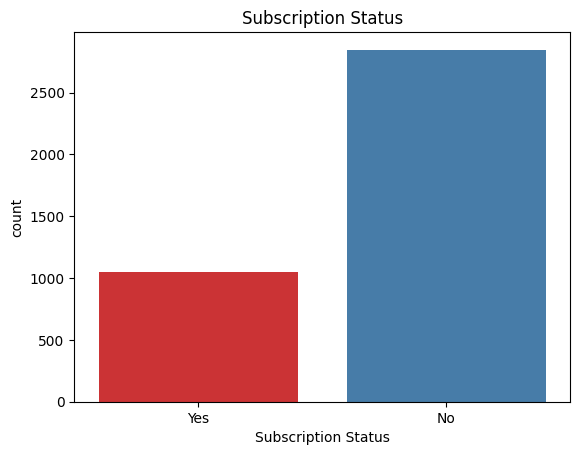

In [16]:
sns.countplot(data=df, x='Subscription Status', palette='Set1')
plt.title("Subscription Status")
plt.show()

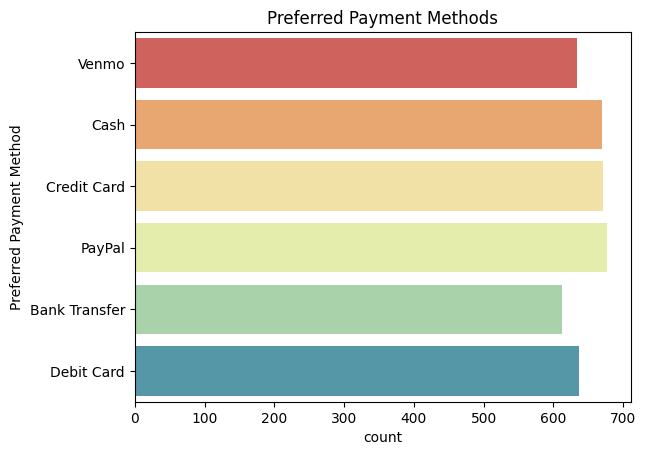

In [17]:
sns.countplot(data=df, y='Preferred Payment Method', palette='Spectral')
plt.title("Preferred Payment Methods")
plt.show()

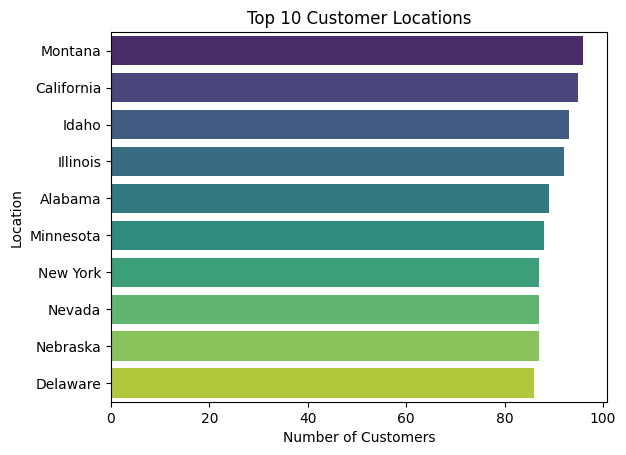

In [18]:
top_locations = df['Location'].value_counts().nlargest(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title("Top 10 Customer Locations")
plt.xlabel("Number of Customers")
plt.show()

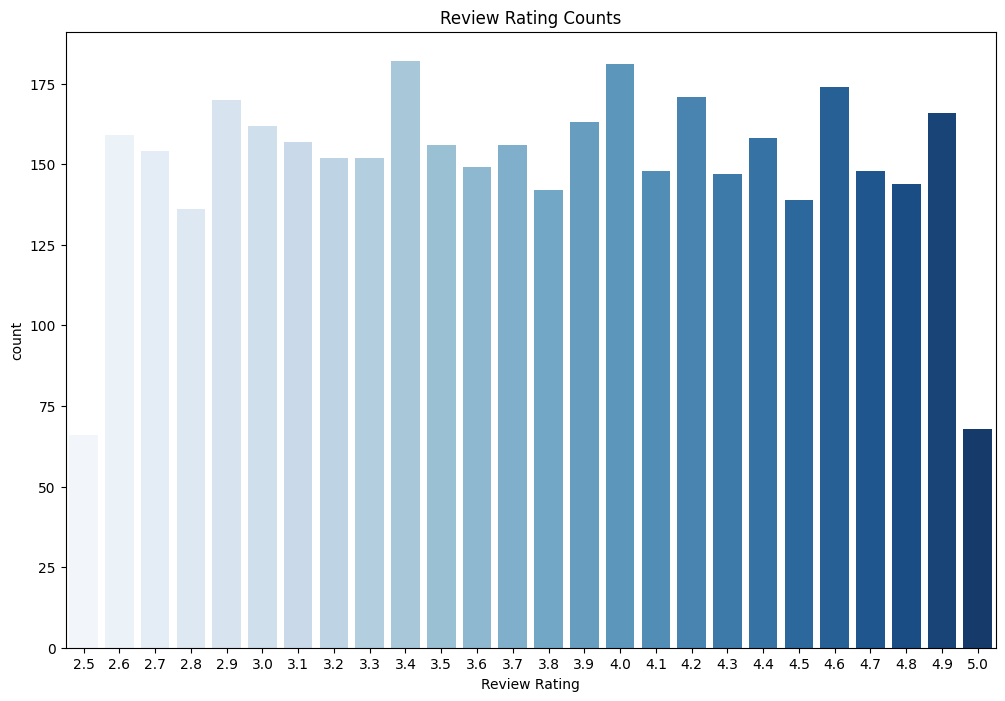

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Review Rating', palette='Blues')
plt.title("Review Rating Counts")
plt.show()

In [21]:
from sqlalchemy import create_engine
import urllib

# Make sure df_clean exists from your previous cells
df_clean = pd.read_csv('../data/shopping_trends.csv') 

# UPDATE YOUR SERVER NAME HERE
server_name = 'DESKTOP-7PL2G9M'
database_name = 'ShoppingDB'
table_name = 'shopping_data'

# Create the connection string and engine
params = urllib.parse.quote_plus(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server_name};"
    f"DATABASE={database_name};"
    f"Trusted_Connection=yes;"
)
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

# Load the data into the SQL table
df_clean.to_sql(table_name, con=engine, if_exists='replace', index=False)
    
print(f"🚀 Success! Data loaded into the '{table_name}' table.")

🚀 Success! Data loaded into the 'shopping_data' table.
